# Single-Band Cutouts

This notebook shows examples of how to create single-band cutouts of targets from a larger image. The user provides a catalog containing the target coordinates and the cutout sizes. Cutouts are generated using `make_cutouts()` routine from `astroimtools`. It uses [Cutout2D](https://docs.astropy.org/en/stable/api/astropy.nddata.utils.Cutout2D.html) from Astropy or [reproject](https://reproject.readthedocs.io/en/stable/). There is also a `show_cutout_with_slit()` routine to overplot slit apertures on the cutouts.

## Make cutouts

In [1]:
from astroimtools.cutout_tools import make_cutouts

Below we show an example using a simulated NIRCam image (`sim143951060215_0_0-detA1-corrected_wcs.fits`) and a catalog
of sources in this image (`MOS_8458_G395H-cutouts.txt`). Other than this example, the cutout tool can be used for any
catalog/image combination, as long as the image has a valid WCS and the catalog is in [ECSV](https://docs.astropy.org/en/stable/api/astropy.io.ascii.Ecsv.html) format with the required columns, as illustrated below:

```
# %ECSV 0.9
# ---
# datatype:
# - {name: id, datatype: string}
# - {name: ra, unit: deg, datatype: float64}
# - {name: dec, unit: deg, datatype: float64}
# - {name: cutout_x_size, unit: arcsec, datatype: float64}
# - {name: cutout_y_size, unit: arcsec, datatype: float64}
# - {name: cutout_pa, unit: deg, datatype: float64}
# - {name: spatial_pixel_scale, unit: arcsec / pix, datatype: float64}
id ra dec cutout_x_size cutout_y_size cutout_pa spatial_pixel_scale
MOS_1_010_133 359.996992846 0.00394170958794 0.0 10.0 10.0 0.1
MOS_1_010_135 359.988641919 0.00562150075824 0.0 10.0 10.0 0.1
MOS_1_010_137 359.990036305 0.00564101286996 0.0 10.0 10.0 0.1
MOS_1_010_139 359.996571074 0.00632077788397 0.0 10.0 10.0 0.1
...           ...           ...              ... ...  ...  ...
```

In the table above, the `cutout_pa` column is only required if you want to rotate the image prior to making a cutout (see the next sub-section). The table may also contain other columns but they will be ignored. Column names are case-sensitive.

In [2]:
# Define master image and catalog filenames, which must already exist.
imagename = 'data/sim143951060215_0_0-detA1-corrected_wcs.fits'
catalogname = 'data/MOS_8458_G395H-cutouts.txt'

Make cutouts of the image based on the catalog:

In [3]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f115w', clobber=True)

INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_010_133_jwst_nircam_f115w_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_184_053_jwst_nircam_f115w_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_2_359_145_jwst_nircam_f115w_cutout.fits [astroimtools.cutout_tools]


In the real world (see **Example using GOODS-S Data** sub-section below), you would use a different master image for a different instrument/filter. Here, we only have one fake data, so for illustration purpose, we repeat the above for two other different instrument/filter combinations:

In [4]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f200w', clobber=True, verbose=False)
make_cutouts(catalogname, imagename, 'hst_wfc3ir_f160w', clobber=True, verbose=False)

### Cutouts with Rotation

If the catalog has a `cutout_pa` column anywhere in the table, you can also choose to rotate the region of interest first before making a cutout by passing in the `apply_rotation=True` option. You can also choose to ignore rotation by setting `apply_rotation=False`, which is also the default behavior. Positive angle gives a clockwise rotation.

The example below uses same image and catalog as the previous section, but with rotation:

In [5]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f115w_rotated', apply_rotation=True, clobber=True)

INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_010_133_jwst_nircam_f115w_rotated_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_184_053_jwst_nircam_f115w_rotated_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_359_097_jwst_nircam_f115w_rotated_cutout.fits [astroimtools.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_2_359_145_jwst_nircam_f115w_rotated_cutout.fits [astroimtools.cutout_tools]


Below we plot example cutout images without and with rotation:

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

In [7]:
data = fits.getdata('jwst_nircam_f115w_cutouts/MOS_1_010_133_jwst_nircam_f115w_cutout.fits')
data_rot = fits.getdata('jwst_nircam_f115w_rotated_cutouts/MOS_1_010_133_jwst_nircam_f115w_rotated_cutout.fits')

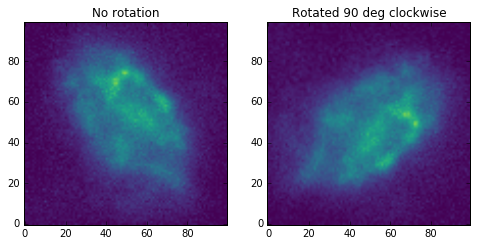

In [8]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(data, vmin=200, vmax=1000, cmap=plt.cm.viridis)
ax1.set_title('No rotation')

ax2.imshow(data_rot, vmin=200, vmax=1000, cmap=plt.cm.viridis)
ax2.set_title('Rotated 90 deg clockwise')

## Show cutouts with slit overlay

This sub-section shows different examples of overlaying slit(s) on a cutout image.

In [9]:
from astroimtools.cutout_tools import show_cutout_with_slit

Show slit aperture (in red) on the NIRCam F115W cutout for object ID `MOS_2_359_145` generated by `make_cutouts()` routine above. In this example, slit is assumed to be rectangular, centered on the object, and have a position angle of 90 degrees with respect to West-East (assuming standard position angle definitions):

In [10]:
with fits.open('jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

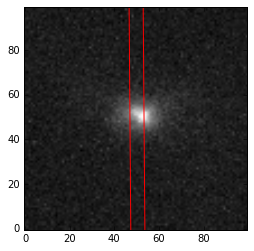

In [11]:
show_cutout_with_slit(hdr, data=data, color='red')

Show the slit above on the same cutout, but at 45-degree and 0-degree rotations. We also use a custom plot layout, without any axis labels:

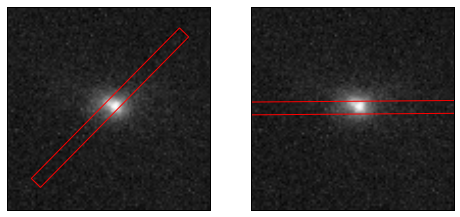

In [12]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

show_cutout_with_slit(hdr, data=data, slit_angle=45, color='red', ax=ax1)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

show_cutout_with_slit(hdr, data=data, slit_angle=0, color='red', ax=ax2)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

Show a circular spectral aperture (white) with 0.5 arcsec radius on a different cutout image, displayed with a different colormap. A background annulus (red) centered on the object is also displayed (as an overlay on the existing plot):

In [13]:
with fits.open('hst_wfc3ir_f160w_cutouts/MOS_1_184_053_hst_wfc3ir_f160w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

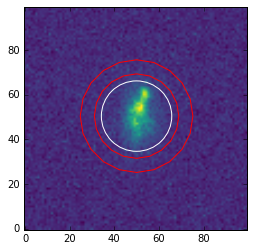

In [14]:
fig, ax = plt.subplots()

show_cutout_with_slit(hdr, data=data, slit_shape='circular', slit_radius=0.5,
                      cmap='viridis', color='white', ax=ax)
show_cutout_with_slit(hdr, slit_shape='annulus', slit_radius=0.6, slit_rout=0.8,
                      color='red', ax=ax)

Show MSA slitlets (red) on yet another cutout image, at two different position angles:

In [15]:
with fits.open('jwst_nircam_f200w_cutouts/MOS_1_010_133_jwst_nircam_f200w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header
    
obj_ra = hdr['OBJ_RA']
obj_dec = hdr['OBJ_DEC']
print(obj_ra, obj_dec)

359.996992846 0.00394170958794


In [16]:
from astropy import units as u

# The MSA shutters have an open area of ~0.20” (dispersion axis) x 0.45” (spatial axis)
# and a closed area of ~0.26 x 0.51” surrounding it. That is, there’s a
# region between 0.20" and 0.26", and 0.45" and 0.51”, that’s not exposed.
# In addition, the “walls” separating individual shutters are ~0.06" wide.
disp_sep = (0.26 * u.arcsec).to(u.deg).value
spat_sep = (0.51 * u.arcsec).to(u.deg).value

# Generate some fake slitlet position to represent MSA shutters.
d_ra = disp_sep
d_dec = spat_sep
fake_ra = [obj_ra - d_ra] * 3 + [obj_ra] * 3 + [obj_ra + d_ra] * 3
fake_dec = [obj_dec - d_dec, obj_dec, obj_dec + d_dec] * 3

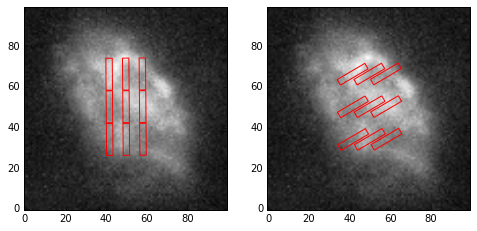

In [17]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

show_cutout_with_slit(hdr, data=data, slit_ra=fake_ra, slit_dec=fake_dec,
                      slit_width=0.1, slit_length=0.5, color='red', ax=ax1)
show_cutout_with_slit(hdr, data=data, slit_ra=fake_ra, slit_dec=fake_dec, slit_angle=30,
                      slit_width=0.1, slit_length=0.5, color='red', ax=ax2)

Using the same cutout as before, show a rectangular slit in semi-transparent custom color (for both fill and edge) and save it out to a PNG file:

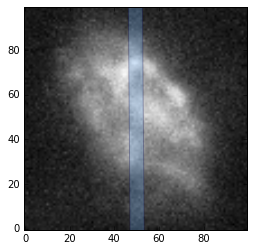

In [18]:
show_cutout_with_slit(hdr, data=data, plotname='awesome_object.png',
                      fill=True, fc='#6daaed', ec='#0a0443', alpha=0.3)

## Example using GOODS-S Data

This sub-section shows usage of the same tools above but with real [CANDELS GOODS-S Data Release](http://arcoiris.ucolick.org/candels/data_access/GOODS-S.html). The data shown here is a subset of Deep JH subregion from `gsd01` epoch.

Due to the huge file size of the drizzled products, the codes to make cutouts are simply laid out below but not run in this notebook to avoid having to include those data files as part of `astroimtools` distribution.

To make some example cutout images via Python:

```python
# This is where the data live but with very limited access.
path = '/astro/3/jwst_da_sprint_testdata/mostools/CANDELS_GOODS/'

# This is a subset of CANDELS.GOODSS.F160W.v1.fits reformatted
# to ECSV (ASCII) table. Not all original columns are included
# and those included were renamed.
catalogname = path + 'CANDELS.GOODSS.F160W.v1.subset.txt'

# Make cutouts for all three instrument/filter combos.
make_cutouts(catalogname, path + 'hlsp_candels_hst_acs_gsd01_f814w_v0.5_drz.fits',
             'hst_acs_f814w', clobber=True)
make_cutouts(catalogname, path + 'hlsp_candels_hst_wfc3_gsd01_f125w_v0.5_drz.fits',
             'hst_wfc3ir_f125w', clobber=True)
make_cutouts(catalogname, path + 'hlsp_candels_hst_wfc3_gsd01_f160w_v0.5_drz.fits',
             'hst_wfc3ir_f160w', clobber=True)
```

Once the cutouts were created, 3 of them were copied via command line to the notebook's `data` directory for the rest of the examples:

```
cd /astro/3/jwst_da_sprint_testdata/mostools/CANDELS_GOODS/
cp hst_acs_f814w_cutouts/CANDELS_GDS_F160W_J033231.70-274626.2_hst_acs_f814w_cutout.fits .../notebooks/data
cp hst_wfc3ir_f125w_cutouts/CANDELS_GDS_F160W_J033231.70-274626.2_hst_wfc3ir_f125w_cutout.fits .../notebooks/data
cp hst_wfc3ir_f160w_cutouts/CANDELS_GDS_F160W_J033231.70-274626.2_hst_wfc3ir_f160w_cutout.fits .../notebooks/data
```

The example below displays a slit on the HST ACS/WFC F814W cutout for object named `CANDELS_GDS_F160W_J033231.70-274626.2`:

In [19]:
with fits.open('data/CANDELS_GDS_F160W_J033231.70-274626.2_hst_acs_f814w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

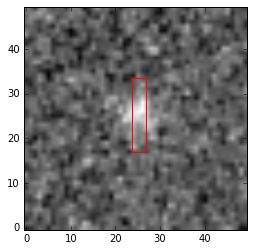

In [20]:
show_cutout_with_slit(hdr, data=data, slit_width=0.1, slit_length=0.5, color='red')